In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as npimport matplotlib.pyplot as plot
np.random.seed(10)
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()
x_train=x_train_image.reshape(60000,784).astype('float32')
x_test=x_test_image.reshape(10000,784).astype('float32')
x_train_normalize=x_train/255
x_test_normalize=x_test/255
y_train_ohe=np_utils.to_categorical(y_train_label)
y_test_ohe=np_utils.to_categorical(y_test_label)

Using TensorFlow backend.


In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model=Sequential()
model.add(Dense(units=1024,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=512,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
train_history=model.fit(x=x_train_normalize,y=y_train_ohe,validation_split=0.2,epochs=8,batch_size=200,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
48000/48000 [==============================] - 17s 350us/step - loss: 0.3402 - acc: 0.8950 - val_loss: 0.1325 - val_acc: 0.9603
Epoch 2/8
48000/48000 [==============================] - 15s 322us/step - loss: 0.1504 - acc: 0.9543 - val_loss: 0.1068 - val_acc: 0.9664
Epoch 3/8
48000/48000 [==============================] - 16s 329us/step - loss: 0.1089 - acc: 0.9656 - val_loss: 0.0869 - val_acc: 0.9730
Epoch 4/8
48000/48000 [==============================] - 16s 331us/step - loss: 0.0876 - acc: 0.9723 - val_loss: 0.0819 - val_acc: 0.9748
Epoch 5/8
48000/48000 [==============================] - 16s 336us/step - loss: 0.0770 - acc: 0.9761 - val_loss: 0.0788 - val_acc: 0.9765
Epoch 6/8
48000/48000 [==============================] - 16s 340us/step - loss: 0.0623 - acc: 0.9797 - val_loss: 0.0731 - val_acc: 0.9784
Epoch 7/8
48000/48000 [==============================] - 17s 353us/step - loss: 0.0580 - acc: 0.9811 - val_loss: 0.0732 - 

In [49]:
import matplotlib.pyplot as plot

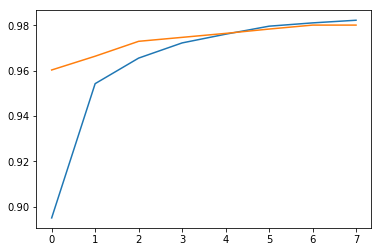

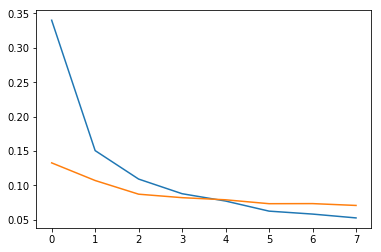

10000/10000 [==============================] - 2s 180us/step
acc= 0.9833


In [50]:
def show_train(train_history,train,validation):
    plot.plot(train_history.history[train])
    plot.plot(train_history.history[validation])
    plot.show()
show_train(train_history,'acc','val_acc')
show_train(train_history,'loss','val_loss')
result=model.evaluate(x_test_normalize,y_test_ohe)
print('acc=',result[1])

In [51]:
import pandas as pd
prediction=model.predict_classes(x_test)
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,1,1,0,1,1,1,1,0
1,0,1130,2,0,0,1,1,0,1,0
2,3,0,1015,3,1,0,1,5,4,0
3,1,0,0,1001,0,2,0,3,3,0
4,2,2,2,1,963,0,3,2,1,6
5,2,0,0,15,1,868,4,0,2,0
6,2,3,0,1,3,5,942,0,2,0
7,1,6,4,1,0,0,0,1013,1,2
8,2,0,3,8,3,1,1,5,949,2


In [52]:
df=pd.DataFrame({'label':y_test_label,'prediction':prediction})
df[(df.label==4)&(df.prediction==9)]

,label,prediction
707,4,9
1242,4,9
2053,4,9
2130,4,9
5936,4,9
8527,4,9


In [53]:
result=model.predict_classes(x_test).astype(int) 
true_acc=0
for index in range(len(result)):
    if result[index]==y_test_label[index]:
        true_acc+=1
true_acc/=len(result)
print(result,true_acc)

[7 2 1 ... 4 5 6] 0.9829
